In [0]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

In [12]:
torch.manual_seed(1)
X = torch.Tensor([[1, 0, 0, -1],[0, 1, 0, -1]])
y = torch.Tensor([1, 1, -1, -1])
alpha = 0.001
C = 1

class ShallowNet(nn.Module):
    def __init__(self):
        super(ShallowNet, self).__init__()
        self.fc1 = nn.Linear(2,1, bias=True)
    
    def forward(self, X):
        return self.fc1(X)

net = ShallowNet()
print(net)

ShallowNet(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)


In [13]:
print(net(torch.transpose(X,0,1)).squeeze())

optimizer = optim.SGD(net.parameters(), lr=alpha, weight_decay=0)
optimizer.zero_grad()

#print(optimizer)

params = list(net.parameters())
params[0].data = torch.Tensor([[2, 2]])
params[1].data = torch.Tensor([-1])

print(net.fc1.weight)

tensor([ 0.2273, -0.4492, -0.1371, -0.1893], grad_fn=<SqueezeBackward0>)
Parameter containing:
tensor([[2., 2.]], requires_grad=True)


Streaming output truncated to the last 5000 lines.
Parameter containing:
tensor([[0.6674, 0.6674]], requires_grad=True)
Parameter containing:
tensor([0.3330], requires_grad=True)
Iter: 9001; Loss: 1.778453; ||g||: 1.943898
Parameter containing:
tensor([[0.6668, 0.6668]], requires_grad=True)
Parameter containing:
tensor([0.3320], requires_grad=True)
Iter: 9002; Loss: 1.779062; ||g||: 1.471259
Parameter containing:
tensor([[0.6671, 0.6671]], requires_grad=True)
Parameter containing:
tensor([0.3330], requires_grad=True)
Iter: 9003; Loss: 1.778007; ||g||: 1.943426
Parameter containing:
tensor([[0.6664, 0.6664]], requires_grad=True)
Parameter containing:
tensor([0.3320], requires_grad=True)
Iter: 9004; Loss: 1.779285; ||g||: 1.471731
Parameter containing:
tensor([[0.6668, 0.6668]], requires_grad=True)
Parameter containing:
tensor([0.3330], requires_grad=True)
Iter: 9005; Loss: 1.778062; ||g||: 1.471259
Parameter containing:
tensor([[0.6671, 0.6671]], requires_grad=True)
Parameter containing

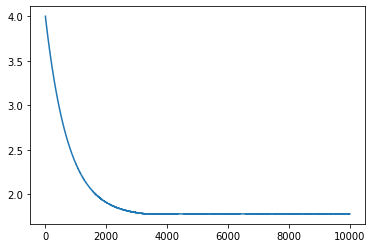

In [15]:
farr = []

for iter in range(10000):
    if iter==0:
        print(1 - y*net(torch.transpose(X,0,1)).squeeze())
    ##############################
    ## Complete this single line which is our cost function
    ## Dimensions: loss (scalar)
    ##############################
    loss = C/2*torch.sum(torch.mul(net.fc1.weight, net.fc1.weight))+ \
               torch.sum(nn.functional.relu(1 - y*(torch.matmul(net.fc1.weight, X)+net.fc1.bias)))
    
    loss.backward()
    gn = 0
    for f in net.parameters():
        if iter==0:
            print("Test")
            print(f.grad)
        gn = gn + torch.norm(f.grad)
    print("Iter: %d; Loss: %f; ||g||: %f" % (iter, loss, gn))
    optimizer.step()
    optimizer.zero_grad()

    farr.append(loss.item())

    for f in net.parameters():
        print(f)

plt.plot(farr)
plt.show()

In [7]:
a=torch.tensor([[1,3]])
b=torch.tensor([[1,3,4],[2,7,8]])
torch.matmul(a,b)
#torch.mul(net.fc1.weight, X))

tensor([[ 7, 24, 28]])

In [18]:
X = torch.Tensor([[1, 0, 0, -1],[0, 1, 0, -1]])
y = torch.Tensor([1, 1, -1, -1])
alpha = 0.001
C = 1

class ShallowNet(nn.Module):
    def __init__(self):
        super(ShallowNet, self).__init__()
        self.fc1 = nn.Linear(2,1, bias=True)
    
    def forward(self, X):
        return self.fc1(X)

net = ShallowNet()
#print(net)
optimizer = optim.SGD(net.parameters(), lr=alpha, weight_decay=0)
optimizer.zero_grad()

#print(optimizer)

params = list(net.parameters())
params[0].data = torch.Tensor([[2, 2]])
params[1].data = torch.Tensor([-1])

print(net.fc1.weight)

loss = C/2*torch.sum(torch.mul(net.fc1.weight, net.fc1.weight))+ \
               torch.sum(nn.functional.relu(1 - y*(torch.matmul(net.fc1.weight, X)+net.fc1.bias)))
    
loss.backward()
for f in net.parameters():
    print("Test")
    print(f.grad)
    print(loss)


Parameter containing:
tensor([[2., 2.]], requires_grad=True)
Test
tensor([[2., 2.]])
tensor(4., grad_fn=<AddBackward0>)
Test
tensor([0.])
tensor(4., grad_fn=<AddBackward0>)
